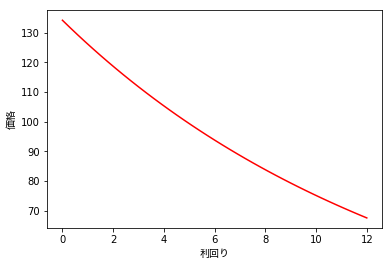

In [41]:
# -*- coding: utf-8 -*-
#   NumPyの読み込み
import numpy as np
#   NumPyのPolynomialモジュールの読み込み
import numpy.polynomial.polynomial as pol
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
import math
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\Windows\Fonts\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoExGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 債券利回りの計算
def Bond_Yield(Price, Maturity, CouponRate, FaceValue):
    CouponC=(math.log(1+0.01*CouponRate))*100 #年複利から連続複利の利率計算
    Coupon = 0.01 * CouponC * FaceValue
    CF = np.r_[-Price, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon]
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = np.asscalar(Real[Real > 0.0])
    return (1.0 / Positive - 1.0) * 100
#%% 債券価格の計算
def Bond_Price(Yield, Maturity, CouponRate, FaceValue):
    CouponC=(math.log(1+0.01*CouponRate))*100 #年複利から連続複利の利率計算
    Coupon = 0.01 * CouponC * FaceValue
    CF = np.r_[0.0, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon]
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), CF)
#%% 債券の利回りと価格の計算
#   利回り7%，残存期間7年，表面利率5%，額面100円の利付債の価格
P_A = Bond_Price(7, 7, 5, 100)
#   価格98円，残存期間5年，表面利率5%，額面100円の利付債の利回り
Y_B = Bond_Yield(98, 5, 5, 100)
#%% 債券の利回りと価格の関係を示すグラフの作成
#   残存期間7年，表面利率5%，額面100円の利付債
V_Yield = np.linspace(0, 12, 41)
V_Price = np.array([Bond_Price(Yield, 7, 5, 100) for Yield in V_Yield])
fig1 = plt.figure(1, facecolor = 'w')
plt.plot(V_Yield, V_Price, 'r-')
plt.xlabel(u'利回り', fontproperties=jpfont)
plt.ylabel(u'価格', fontproperties=jpfont)
plt.show()

In [38]:
P_A

88.56940565476111

In [42]:
Y_B

5.3453852789322465